- RAM : 16GB  
- Processor : i5 1240p

- Ensemble Balanceing Techniques: 
    - Balanced Random forest Classifier
    - Balanced Bagging Classifier
    - RUS Boost Classifier (Boosting) 
    - Easy Ensemble Classiifer (Balanced Ada Boost Classifier)

# Balanced Ensambles

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from time import time
import warnings

warnings.filterwarnings("ignore")


# reading the file
df = pd.read_csv("../dataset/all_three.csv")

## Droping the first column because it is of no use  
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Seagreagting the features and labels 
Y = df[['label']]
X = df[['rec/sent','amount','size','weight','version','lock_time','is_coinbase','has_witness','input_count','output_count','input_total_usd','output_total_usd','fee_usd','fee_per_kb_usd','fee_per_kwu_usd','cdd_total']]

for x in X : 
    p = df[x].max()
    q = len(str(abs(p)))
    X[x] = X[x]/10**q 
    

# Spliting the Data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

# Over sampling the training data
from imblearn.over_sampling import ADASYN
ADASYN_ = ADASYN() 
x_train, y_train = ADASYN_.fit_resample(x_train, y_train)


In [2]:
# function to check the prediction and give total runtime
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from seaborn import heatmap
def check_prediction(y_true, y_pred, start_time) : 
    print(f"Time taken = {time()-start_time} seconds")
    print('accuracy_score:', accuracy_score(y_true, y_pred)) 
    print('confusion_matrix:\n', confusion_matrix(y_true, y_pred)) 
    print('classification_report:\n', classification_report(y_true, y_pred))
    print(heatmap(data=confusion_matrix(y_true, y_pred), annot=True)) 

In [3]:
df['label'].value_counts()
print("training data size")
print(y_train.value_counts())
print("testing data size")
print(y_test.value_counts())

training data size
label
0        268919
2        268901
1        268651
3        268150
Name: count, dtype: int64
testing data size
label
0        66928
2        11200
3         6947
1          450
Name: count, dtype: int64


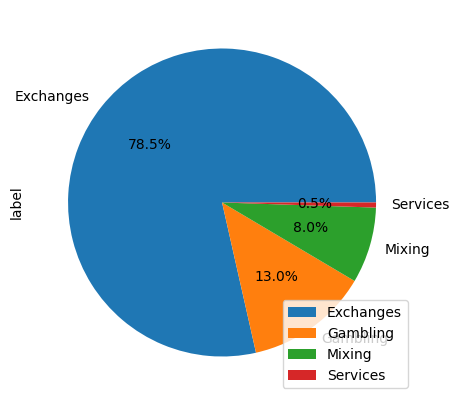

In [4]:
pf2=pd.DataFrame({'label':df['label'].value_counts().to_list()},
                    index=['Exchanges','Gambling', 'Mixing','Services'])

plt=pf2.plot.pie(y='label',autopct='%1.1f%%',figsize=(5,5))

## Balanced Random Forest Classifier

Time taken = 145.88960218429565 seconds
accuracy_score: 0.8146273019584916
confusion_matrix:
 [[51519  7939  1121  6349]
 [   41   386    19     4]
 [    2     1 11197     0]
 [  254    82    42  6569]]
classification_report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87     66928
           1       0.05      0.86      0.09       450
           2       0.90      1.00      0.95     11200
           3       0.51      0.95      0.66      6947

    accuracy                           0.81     85525
   macro avg       0.61      0.89      0.64     85525
weighted avg       0.94      0.81      0.86     85525

Axes(0.125,0.11;0.62x0.77)


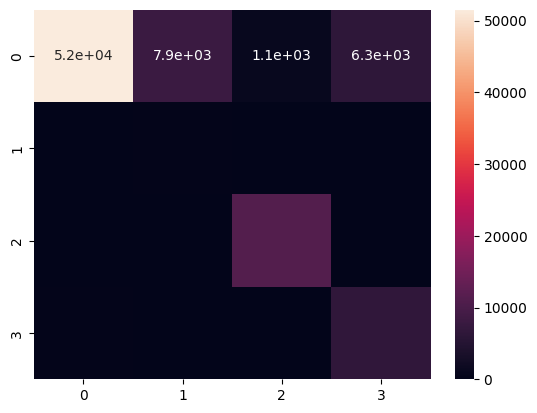

In [5]:
start_time = time()
from imblearn.ensemble import BalancedRandomForestClassifier 
model = BalancedRandomForestClassifier(n_jobs=-1) 
model.fit(x_train, y_train) 

# predicting the model in testing dataset
y_pred = model.predict(x_test)

# Evaluating the model 
check_prediction(y_test, y_pred, start_time)


## Balanced Bagging Classifier

Time taken = 711.4533801078796 seconds
accuracy_score: 0.864296989184449
confusion_matrix:
 [[55869  4788   280  5991]
 [   75   365     6     4]
 [    6     2 11192     0]
 [  406    46     2  6493]]
classification_report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.91     66928
           1       0.07      0.81      0.13       450
           2       0.97      1.00      0.99     11200
           3       0.52      0.93      0.67      6947

    accuracy                           0.86     85525
   macro avg       0.64      0.89      0.67     85525
weighted avg       0.95      0.86      0.89     85525

Axes(0.125,0.11;0.62x0.77)


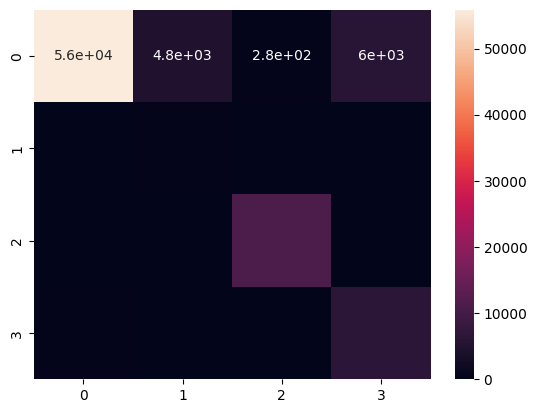

In [6]:
start_time = time()
# Bagging Classifier

# Initializing the base classifier
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier()

# number  of base classifier
n_trees = 50

# initializing the bagging classifier 
from imblearn.ensemble import BalancedBaggingClassifier
model = BalancedBaggingClassifier(estimator = base_model,random_state = 50)

# Cross validation score
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 3,random_state =None)

from sklearn.model_selection import cross_val_score
res = cross_val_score(model, X, Y.values.ravel(), cv = kfold)

model.fit(x_train,y_train.values.ravel())

y_pred = model.predict(x_test)

check_prediction(y_test, y_pred, start_time)



## RUS Boost Classifier (Boosting)

Time taken = 26.77123761177063 seconds
accuracy_score: 0.5760654779304297
confusion_matrix:
 [[42937  5981  4994 13016]
 [   56    41    61   292]
 [    0    80     8 11112]
 [  133   195   337  6282]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78     66928
           1       0.01      0.09      0.01       450
           2       0.00      0.00      0.00     11200
           3       0.20      0.90      0.33      6947

    accuracy                           0.58     85525
   macro avg       0.30      0.41      0.28     85525
weighted avg       0.80      0.58      0.64     85525

Axes(0.125,0.11;0.62x0.77)


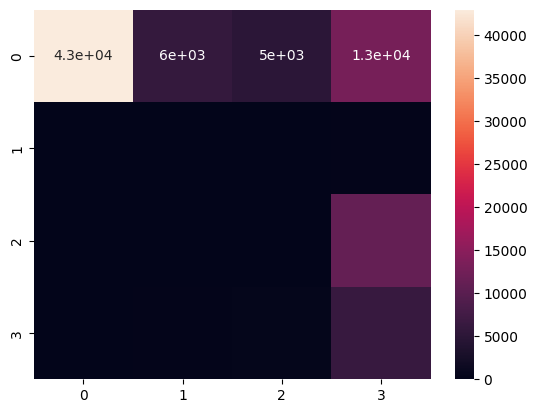

In [7]:
start_time = time()

from imblearn.ensemble import RUSBoostClassifier 
model = RUSBoostClassifier(n_estimators=4, random_state=42) 
model.fit(x_train, y_train.values.ravel()) 
check_prediction(y_test, model.predict(x_test), start_time)



## Easy Ensemble Classiifer (Balanced Ada Boost Classifier)

Time taken = 1012.7659997940063 seconds
accuracy_score: 0.6559368605670857
confusion_matrix:
 [[41351 15860  4141  5576]
 [   46   105    23   276]
 [    0     4  9492  1704]
 [   98   707   991  5151]]
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76     66928
           1       0.01      0.23      0.01       450
           2       0.65      0.85      0.73     11200
           3       0.41      0.74      0.52      6947

    accuracy                           0.66     85525
   macro avg       0.51      0.61      0.51     85525
weighted avg       0.90      0.66      0.74     85525

Axes(0.125,0.11;0.62x0.77)


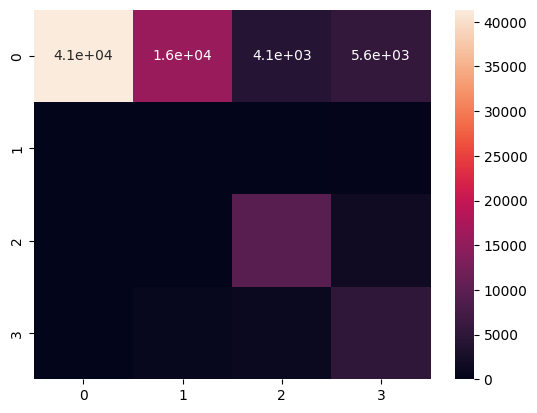

In [8]:
start_time = time() 
from imblearn.ensemble import EasyEnsembleClassifier

model = EasyEnsembleClassifier(n_estimators=4, random_state=42) 

model.fit(x_train, y_train.values.ravel()) 

check_prediction(y_test, model.predict(x_test), start_time) 
